In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing the data given to us by the EPA
df = pd.read_csv("/content/ALL_PFAS_CHEMICALS 3.csv", delimiter = "\t")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_dropped = df.drop(columns=["Regional Board", "Sample ID", "Matrix", "Facility Type",
                                            "Status", "Address", "Site Use", "Site Type", "Field Pt Class",
                                            "Global ID", "Detection Limit","Analytical Method Code",
                                            "Lab Notes", "QRAA", "Units", "Treated Drinking Water Reporting Limit",
                                            "Treated Drinking Water Units"])

# dropped columns that were not essential to our analysis
## don't drop location ID, need to use to identify potential anomaly sites
df_dropped.head()

,Public Water System Name,Site Name,Location ID,Chemical Name,Chemical Abbreviation,Qualifier,Value,Reporting Limit,Date,Treated Drinking Water Sample ID,Treated Drinking Water Qualifier,Treated Drinking Water Value,Treated Drinking Water Date,City,Latitude,"Longitude,,,,,,,,,,,"
0,"MONTEREY PARK-CITY, WATER DEPT.",WELL 12,CA1910092_013_013,Perfluorotridecanoic acid,PFTrDA,<,1.7,1.7,02/11/2021,CA1910092_068_068,<,2.0,03/08/2021,MONTEREY PARK,34.054542,"-118.078033,,,,,,,,,,"
1,LASSEN COUNTY WATER DISTRICT #1,WELL 01,CA1810003_001_001,Perfluorotridecanoic acid,PFTrDA,<,1.8,1.8,12/10/2020,NaN,NaN,NaN,NaN,BIEBER,41.122236,"-121.1428,,,,,,,,,,,"
2,ALAMEDA COUNTY WATER DISTRICT,FARWELL WELL,CA0110001_050_050,Perfluoroheptanoic acid,PFHpA,<,2.0,2.0,06/10/2020,CA0110001_053_053,<,2.0,06/10/2020,FREMONT,37.531867,"-121.99729,,,,,,,,,,,"
3,ALAMEDA COUNTY WATER DISTRICT,PERALTA-TYSON WELL 02,CA0110001_020_020,Perfluoroundecanoic acid,PFUnDA,<,2.0,2.0,02/02/2022,CA0110001_038_038,<,2.0,02/02/2022,FREMONT,37.565310,"-121.978,,,,,,,,,,,"
4,"PARAMOUNT - CITY, WATER DEPT.",WELL 13 - INACTIVE,CA1910105_015_015,Perfluorodecanoic acid,PFDA,<,2.0,2.0,02/03/2020,NaN,NaN,NaN,NaN,PARAMOUNT,33.895565,"-118.163017,,,,,,,,,,"


In [5]:
df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])
df_dropped.head()

# converted date to datetime object

,Public Water System Name,Site Name,Location ID,Chemical Name,Chemical Abbreviation,Qualifier,Value,Reporting Limit,Date,Treated Drinking Water Sample ID,Treated Drinking Water Qualifier,Treated Drinking Water Value,Treated Drinking Water Date,City,Latitude,"Longitude,,,,,,,,,,,"
0,"MONTEREY PARK-CITY, WATER DEPT.",WELL 12,CA1910092_013_013,Perfluorotridecanoic acid,PFTrDA,<,1.7,1.7,2021-02-11,CA1910092_068_068,<,2.0,03/08/2021,MONTEREY PARK,34.054542,"-118.078033,,,,,,,,,,"
1,LASSEN COUNTY WATER DISTRICT #1,WELL 01,CA1810003_001_001,Perfluorotridecanoic acid,PFTrDA,<,1.8,1.8,2020-12-10,NaN,NaN,NaN,NaN,BIEBER,41.122236,"-121.1428,,,,,,,,,,,"
2,ALAMEDA COUNTY WATER DISTRICT,FARWELL WELL,CA0110001_050_050,Perfluoroheptanoic acid,PFHpA,<,2.0,2.0,2020-06-10,CA0110001_053_053,<,2.0,06/10/2020,FREMONT,37.531867,"-121.99729,,,,,,,,,,,"
3,ALAMEDA COUNTY WATER DISTRICT,PERALTA-TYSON WELL 02,CA0110001_020_020,Perfluoroundecanoic acid,PFUnDA,<,2.0,2.0,2022-02-02,CA0110001_038_038,<,2.0,02/02/2022,FREMONT,37.565310,"-121.978,,,,,,,,,,,"
4,"PARAMOUNT - CITY, WATER DEPT.",WELL 13 - INACTIVE,CA1910105_015_015,Perfluorodecanoic acid,PFDA,<,2.0,2.0,2020-02-03,NaN,NaN,NaN,NaN,PARAMOUNT,33.895565,"-118.163017,,,,,,,,,,"


In [6]:
# cleaning column names
df_dropped['Longitude,,,,,,,,,,,'] = df_dropped['Longitude,,,,,,,,,,,'].str.replace(',', '')
df_dropped.rename(columns={'Longitude,,,,,,,,,,,' : 'Longitude'}, inplace=True)
df_dropped.head(10)

,Public Water System Name,Site Name,Location ID,Chemical Name,Chemical Abbreviation,Qualifier,Value,Reporting Limit,Date,Treated Drinking Water Sample ID,Treated Drinking Water Qualifier,Treated Drinking Water Value,Treated Drinking Water Date,City,Latitude,Longitude
0,"MONTEREY PARK-CITY, WATER DEPT.",WELL 12,CA1910092_013_013,Perfluorotridecanoic acid,PFTrDA,<,1.7,1.7,2021-02-11,CA1910092_068_068,<,2.0,03/08/2021,MONTEREY PARK,34.054542,-118.078033
1,LASSEN COUNTY WATER DISTRICT #1,WELL 01,CA1810003_001_001,Perfluorotridecanoic acid,PFTrDA,<,1.8,1.8,2020-12-10,NaN,NaN,NaN,NaN,BIEBER,41.122236,-121.1428
2,ALAMEDA COUNTY WATER DISTRICT,FARWELL WELL,CA0110001_050_050,Perfluoroheptanoic acid,PFHpA,<,2.0,2.0,2020-06-10,CA0110001_053_053,<,2.0,06/10/2020,FREMONT,37.531867,-121.99729
3,ALAMEDA COUNTY WATER DISTRICT,PERALTA-TYSON WELL 02,CA0110001_020_020,Perfluoroundecanoic acid,PFUnDA,<,2.0,2.0,2022-02-02,CA0110001_038_038,<,2.0,02/02/2022,FREMONT,37.565310,-121.978
4,"PARAMOUNT - CITY, WATER DEPT.",WELL 13 - INACTIVE,CA1910105_015_015,Perfluorodecanoic acid,PFDA,<,2.0,2.0,2020-02-03,NaN,NaN,NaN,NaN,PARAMOUNT,33.895565,-118.163017
5,GOLDEN STATE WC - WEST ORANGE,LOWDEN,CA3010022_023_023,Perfluorotridecanoic acid,PFTrDA,<,2.0,2.0,2021-07-26,NaN,NaN,NaN,NaN,LOS ALAMITOS,33.809143,-118.005391
6,CITY OF SAN CLEMENTE,WELL 08,CA3010036_021_021,Perfluorododecanoic acid,PFDoDA,<,2.0,2.0,2022-03-31,NaN,NaN,NaN,NaN,SAN CLEMENTE,33.409780,-117.591243
7,SUBURBAN WATER SYSTEMS-WHITTIER,WELL 201-W8,CA1910174_031_031,Perfluorooctane sulfonic acid (PFOS),PFOS,=,22.0,NaN,2020-02-19,NaN,NaN,NaN,NaN,COVINA,34.025697,-118.048684
8,CAMP PENDLETON (SOUTH),WELL 26071,CA3710702_035_035,Perfluorohexanoic acid,PFHxA,=,11.0,2.0,2022-01-13,CA3710702_049_049,=,3.1,01/03/2022,MCB CAMP PENDLETON,33.310043,-117.3322
9,GOLDEN STATE WC - WEST ORANGE,LOWDEN,CA3010022_023_023,"4,8-Dioxa-3H-perfluorononanoic acid",ADONA,<,2.0,2.0,2021-10-25,NaN,NaN,NaN,NaN,LOS ALAMITOS,33.809143,-118.005391


In [7]:
# only analyzing top 5 most prevalent chemicals
## the team we worked with at the EPA told us which top 5 chemicals to analyze
top_5_chemicals = df_dropped[(df_dropped["Chemical Abbreviation"].isin(["PFNA", "PFHxS", "PFOA", "PFOS", "HFPO-DA"])) &
    (df_dropped["Qualifier"] == "=")]


In [8]:
new_df = top_5_chemicals[["Chemical Abbreviation", "Value", "City","Date", "Public Water System Name", "Site Name"]]
# only focusing on "Chemical Abbreviation", "Value", "Date", "Public Water System Name", "Site Name" columns

# make data frames for all top 5 chemicals to analyze separately
PFOS = new_df[new_df["Chemical Abbreviation"] == "PFOS"].sort_values("Date", ascending = True)
PFNA = new_df[new_df["Chemical Abbreviation"] == "PFNA"].sort_values("Date", ascending = True)
PFHxS = new_df[new_df["Chemical Abbreviation"] == "PFHxS"].sort_values("Date", ascending = True)
PFOA = new_df[new_df["Chemical Abbreviation"] == "PFOA"].sort_values("Date", ascending = True)
HFPO_DA = new_df[new_df["Chemical Abbreviation"] == "HFPO-DA"].sort_values("Date", ascending = True)


# created seperate tables for each chemical and sorted them by date so we can graph timeline of chemical concentration chronologically

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [10]:
# aggregating by mean - for top 5 identified chemicals
## ended up not aggregating by mean for forecasting models because there was not
### enough data!

PFOS["Date"] = pd.to_datetime(PFOS["Date"])
PFOS_avg = PFOS.groupby("Date").agg({"Value": np.mean})
PFOS_avg = PFOS_avg[PFOS_avg.index.year >= 2019]
PFOS_avg = PFOS_avg.reset_index()
PFOS_final = PFOS_avg.merge(PFOS.drop_duplicates(subset="Date"), on="Date", how="left")

PFNA["Date"] = pd.to_datetime(PFNA["Date"])
PFNA_avg = PFNA.groupby("Date").agg({"Value" : np.mean})
PFNA_avg = PFNA_avg[PFNA_avg.index.year >= 2019]
PFNA_avg = PFNA_avg.reset_index()
PFNA_final = PFNA_avg.merge(PFNA.drop_duplicates(subset="Date"), on="Date", how="left")

PFHxS["Date"] = pd.to_datetime(PFHxS["Date"])
PFHxS_avg = PFHxS.groupby("Date").agg({"Value" : np.mean})
PFHxS_avg = PFHxS_avg[PFHxS_avg.index.year >= 2019]
PFHxS_avg = PFHxS_avg.reset_index()
PFHxS_final = PFHxS_avg.merge(PFHxS.drop_duplicates(subset="Date"), on="Date", how="left")


PFOA["Date"] = pd.to_datetime(PFOA["Date"])
PFOA_avg = PFOA.groupby("Date").agg({"Value" : np.mean})
PFOA_avg = PFOA_avg[PFOA_avg.index.year >= 2019]
PFOA_avg = PFOA_avg.reset_index()
PFOA_final = PFOA_avg.merge(PFOA.drop_duplicates(subset="Date"), on="Date", how="left")

HFPO_DA["Date"] = pd.to_datetime(HFPO_DA["Date"])
HFPO_DA_avg = HFPO_DA.groupby("Date").agg({"Value" : np.mean})
HFPO_DA_avg = HFPO_DA_avg[HFPO_DA_avg.index.year >= 2019]
HFPO_DA_avg = HFPO_DA_avg.reset_index()
HFPO_DA_final = HFPO_DA_avg.merge(HFPO_DA.drop_duplicates(subset="Date"), on="Date", how="left")

<ipython-input-10-4612d10bc182>:6: FutureWarning: The provided callable <function mean at 0x7ec93aff95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  PFOS_avg = PFOS.groupby("Date").agg({"Value": np.mean})
<ipython-input-10-4612d10bc182>:12: FutureWarning: The provided callable <function mean at 0x7ec93aff95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  PFNA_avg = PFNA.groupby("Date").agg({"Value" : np.mean})
<ipython-input-10-4612d10bc182>:18: FutureWarning: The provided callable <function mean at 0x7ec93aff95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  PFHxS_avg = PFHxS.groupby("Date").agg({"Value

<Axes: xlabel='Date', ylabel='Value_x'>

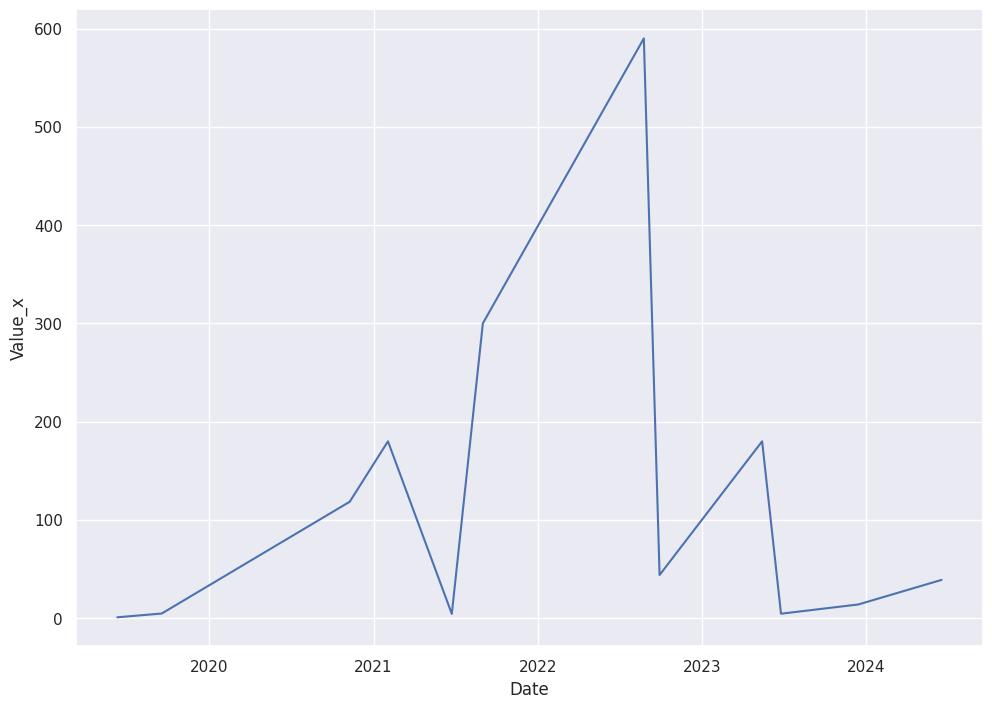

In [11]:
# investigating SLO, chemical PFHxS
## simple plot of aggregated values over time
PFHxS_slo = PFHxS_final[
    (PFHxS_final["City"] == "SAN LUIS OBISPO")]
sns.lineplot(x = PFHxS_slo["Date"], y = PFHxS_slo["Value_x"])

<Axes: xlabel='Date', ylabel='Value_x'>

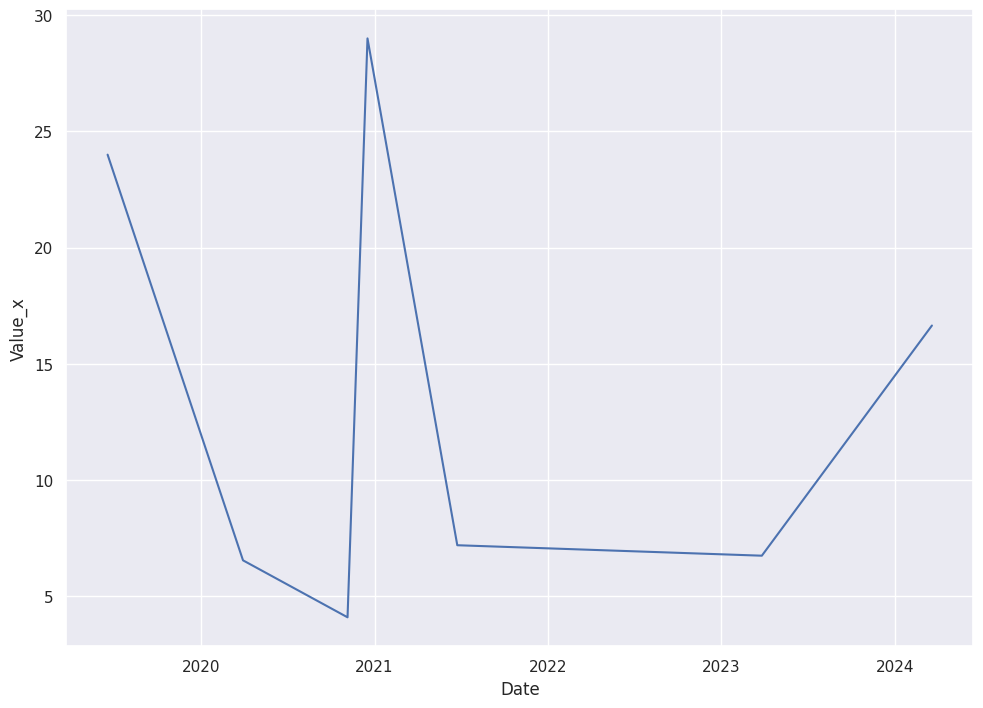

In [12]:
# investigating SLO, chemical PFOA
## simple plot of aggregated values over time
PFOA_slo = PFOA_final[
    (PFOA_final["City"] == "SAN LUIS OBISPO")]
sns.lineplot(x = PFOA_slo["Date"], y = PFOA_slo["Value_x"])

<Axes: xlabel='Date', ylabel='Value'>

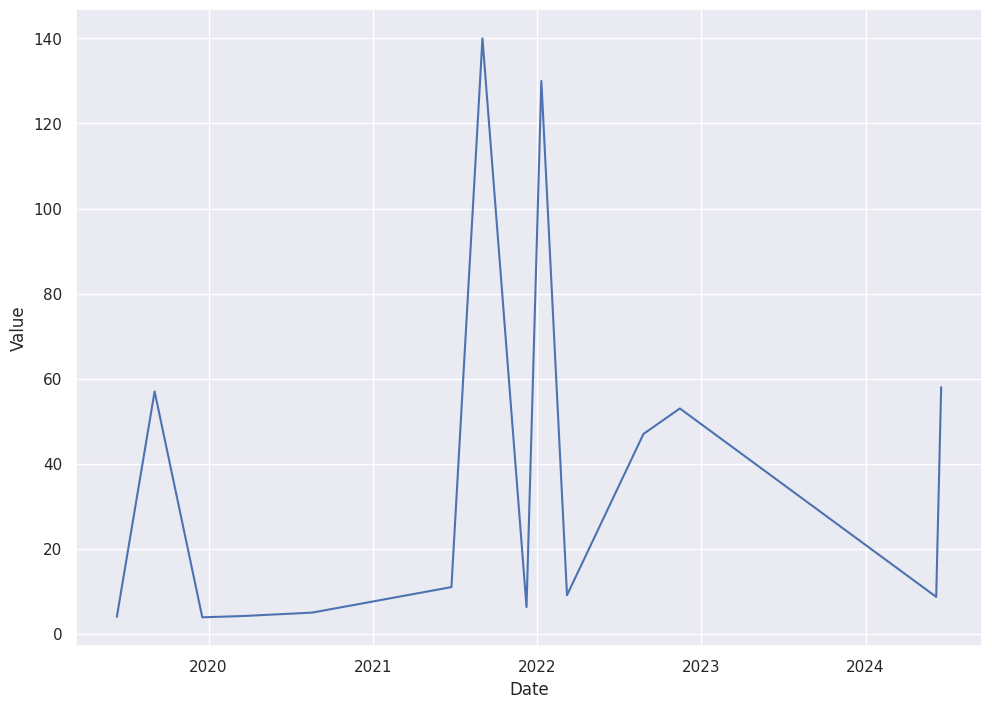

In [13]:
# investigating SLO, chemical PFOS
## simple plot of NON-aggregated values over time, to see if non-aggregated values
## give us more insight

PFOS_slo = PFOS[
    (PFOS["City"] == "SAN LUIS OBISPO")]
sns.lineplot(x = PFOS_slo["Date"], y = PFOS_slo["Value"])

<Axes: xlabel='Date', ylabel='Value'>

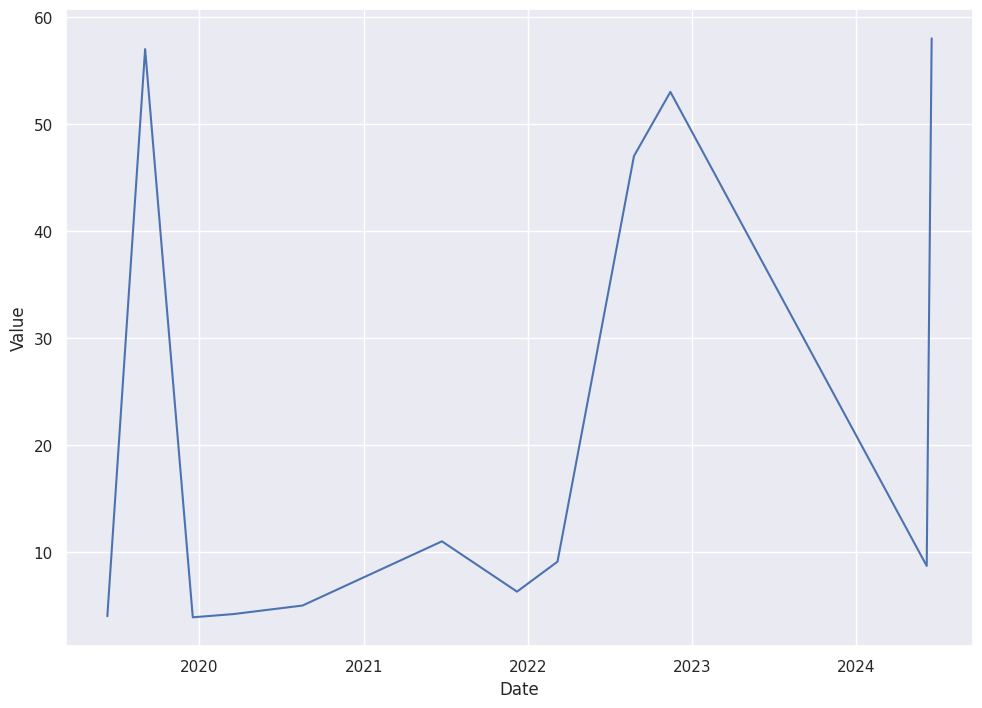

In [14]:
# removing outliers for PFOS values, as directed by EPA team
PFOS_slo = PFOS_slo[
    PFOS_slo["Value"] <= 125]
sns.lineplot(x = PFOS_slo["Date"], y = PFOS_slo["Value"])

<ipython-input-15-1d82a87760dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFOS_prophet_SLO.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)
<ipython-input-15-1d82a87760dd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFOS_prophet_SLO['cap'] = 125
<ipython-input-15-1d82a87760dd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

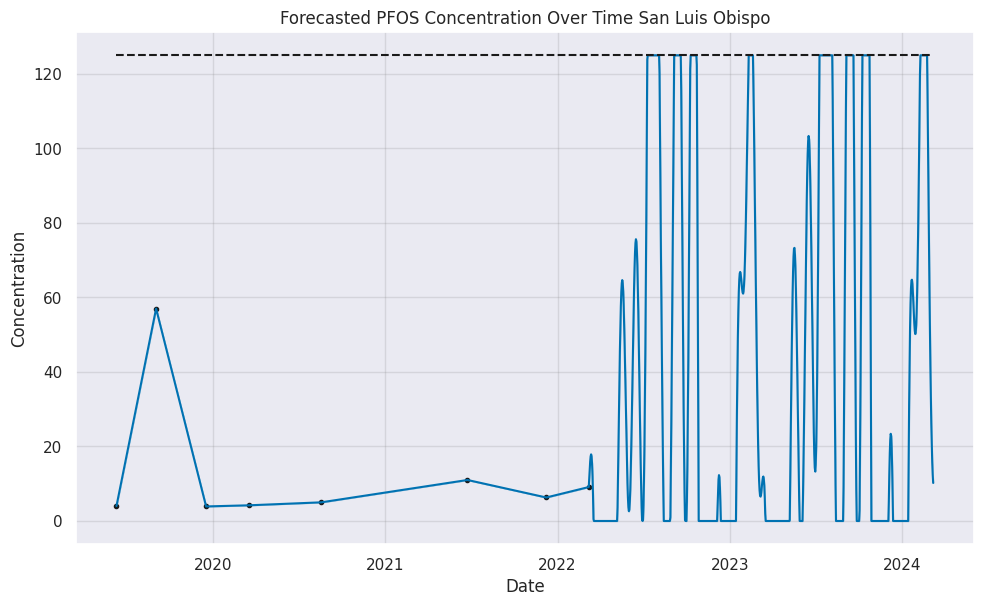

In [15]:
## TIME SERIES FORECASTING FOR PFOS IN SLO, IN SLO COUNTY
## using Prophet forecasting modeling

### decided to use non-aggregated data because provided us with more datapoints

# Remove outliers from the dataset
from prophet import Prophet
import matplotlib.pyplot as plt


# Prepare the data
PFOS_prophet_SLO = PFOS_slo[["Date", "Value"]]
PFOS_prophet_SLO.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)

# Add cap and floor BEFORE splitting the dataset
PFOS_prophet_SLO['cap'] = 125
PFOS_prophet_SLO['floor'] = 0

# Split into training and testing sets
trainPFOS_SLO = PFOS_prophet_SLO.head(int(PFOS_prophet_SLO.shape[0] * 0.70))
testPFOS_SLO = PFOS_prophet_SLO.tail(int(PFOS_prophet_SLO.shape[0] * 0.30))

# Initialize Prophet with logistic growth and parameter tuning
m = Prophet(
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=15,  # Adjust seasonality flexibility
    changepoint_prior_scale=0.5,  # Adjust trend flexibility
    growth='linear' # for more flexibility
)


m.add_seasonality(name='quarter', period=91.25, fourier_order=3)
m.add_seasonality(name='tri', period=122.5, fourier_order=3)

# Fit the model
m.fit(trainPFOS_SLO)

# Create future dataframe for forecasting
futurePFOS_SLO = m.make_future_dataframe(periods=730)
futurePFOS_SLO['cap'] = 125
futurePFOS_SLO['floor'] = 0

# Make predictions
forecastPFOS_SLO = m.predict(futurePFOS_SLO)


forecastPFOS_SLO['yhat'] = forecastPFOS_SLO['yhat'].clip(lower=0, upper=125)
forecastPFOS_SLO['yhat_lower'] = forecastPFOS_SLO['yhat_lower'].clip(lower=0, upper=125)
forecastPFOS_SLO['yhat_upper'] = forecastPFOS_SLO['yhat_upper'].clip(lower=0, upper=125)

# Plot the adjusted forecast
fig1 = m.plot(forecastPFOS_SLO)
plt.title("Forecasted PFOS Concentration Over Time San Luis Obispo")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.show()



In [16]:
from sklearn.metrics import mean_absolute_percentage_error

# Merge test and forecast data
merged_data = pd.merge(testPFOS_SLO, forecastPFOS_SLO[['ds', 'yhat']], on='ds', how='inner')

# Calculate MAPE
mape = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])

print(f"MAPE: {mape * 100:.2f}%")


MAPE: 100.00%


Very poor metric value. Model performs poorly because of poor and inadequate data. Hard to adjust this model without better data from the EPA themselves.

<Axes: xlabel='Date', ylabel='Value'>

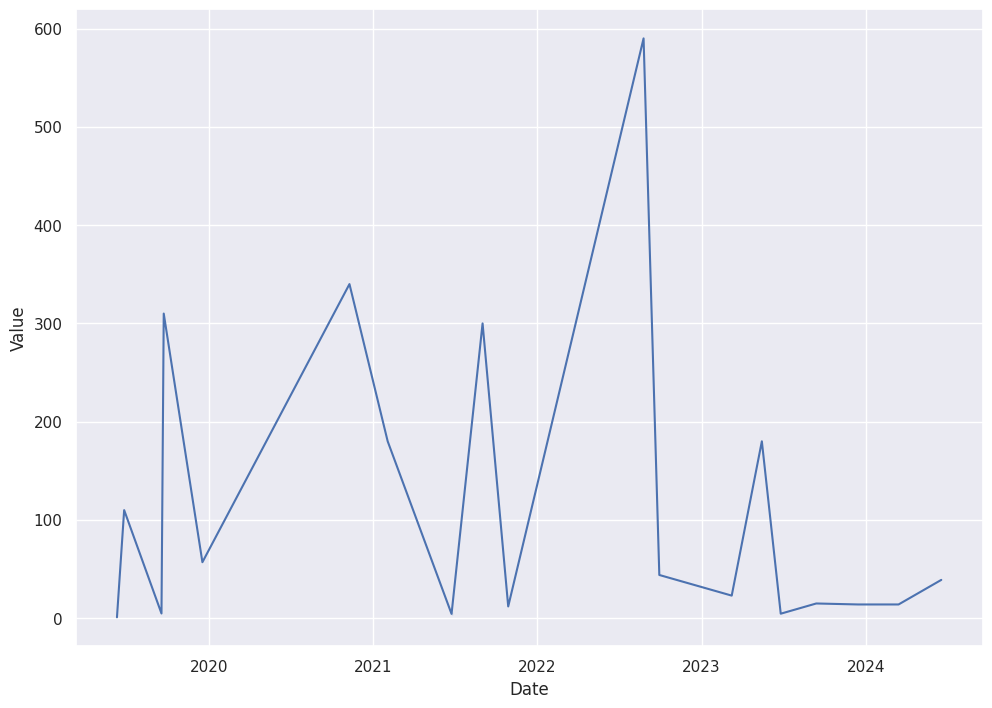

In [17]:
## switching to looking at non-aggregated data
PFHxS_slo = PFHxS[
    (PFHxS["City"] == "SAN LUIS OBISPO")]
sns.lineplot(x = PFHxS_slo["Date"], y = PFHxS_slo["Value"])

<Axes: xlabel='Date', ylabel='Value'>

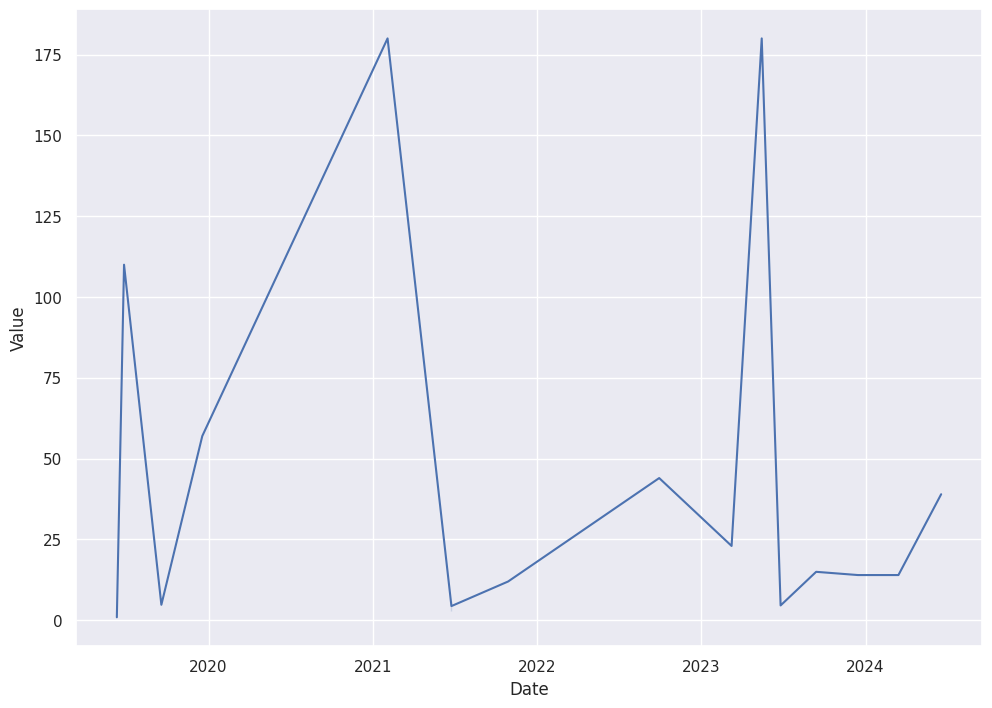

In [18]:
## removing outliers this time for PFHxS
PFHxS_slo = PFHxS_slo[
    PFHxS_slo["Value"] < 200]
sns.lineplot(x = PFHxS_slo["Date"], y = PFHxS_slo["Value"])

<ipython-input-19-4bf0ad4b7749>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFHxS_prophet_SLO.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)
<ipython-input-19-4bf0ad4b7749>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFHxS_prophet_SLO['cap'] = 300
<ipython-input-19-4bf0ad4b7749>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

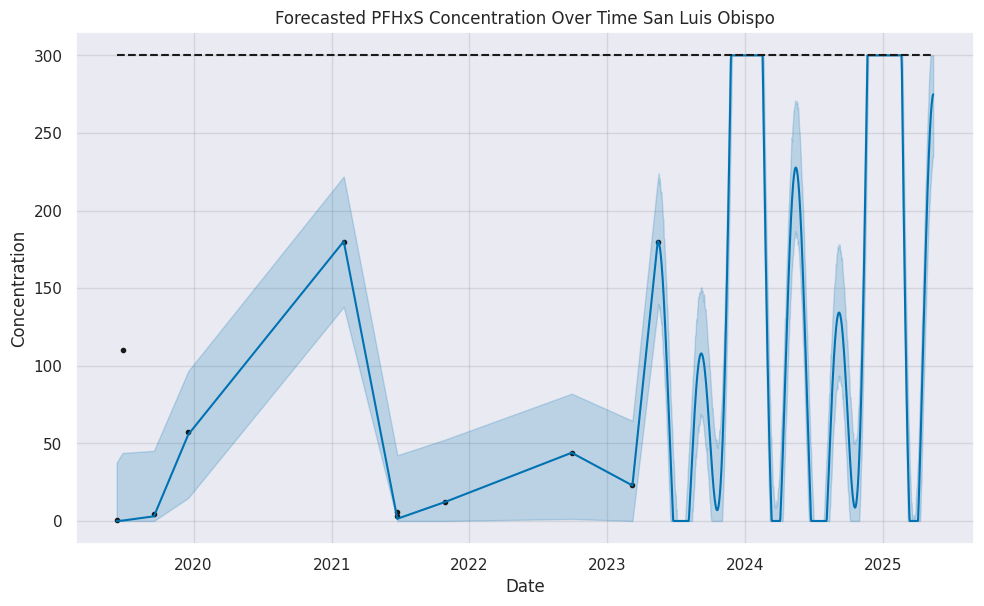

In [19]:
## TIME SERIES FOR PFHxS IN SLO, IN SLO COUNTY
## non-aggregated values

# Remove outliers from the dataset
from prophet import Prophet
import matplotlib.pyplot as plt


# Prepare the data
PFHxS_prophet_SLO = PFHxS_slo[["Date", "Value"]]
PFHxS_prophet_SLO.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)

# Add cap and floor BEFORE splitting the dataset
PFHxS_prophet_SLO['cap'] = 300
PFHxS_prophet_SLO['floor'] = 0

# Split into training and testing sets
trainPFHxS_SLO = PFHxS_prophet_SLO.head(int(PFHxS_prophet_SLO.shape[0] * 0.70))
testPFHxS_SLO = PFHxS_prophet_SLO.tail(int(PFHxS_prophet_SLO.shape[0] * 0.30))

# Initialize Prophet with logistic growth and parameter tuning
m = Prophet(
    daily_seasonality= True,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=15,  # Adjust seasonality flexibility
    changepoint_prior_scale=0.5,  # Adjust trend flexibility
    growth='linear' # for more flexibility
)

m.add_seasonality(name='yearly', period=365.25, fourier_order=3)

# Fit the model
m.fit(trainPFHxS_SLO)

# Create future dataframe for forecasting
futurePFHxS_SLO = m.make_future_dataframe(periods=730)
futurePFHxS_SLO['cap'] = 300
futurePFHxS_SLO['floor'] = 0

# Make predictions
forecastPFHxS_SLO = m.predict(futurePFHxS_SLO)


forecastPFHxS_SLO['yhat'] = forecastPFHxS_SLO['yhat'].clip(lower=0, upper=300)
forecastPFHxS_SLO['yhat_lower'] = forecastPFHxS_SLO['yhat_lower'].clip(lower=0, upper=300)
forecastPFHxS_SLO['yhat_upper'] = forecastPFHxS_SLO['yhat_upper'].clip(lower=0, upper=300)

# Plot the adjusted forecast
fig1 = m.plot(forecastPFHxS_SLO)
plt.title("Forecasted PFHxS Concentration Over Time San Luis Obispo")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.show()



In [20]:
from sklearn.metrics import mean_absolute_percentage_error

# Merge test and forecast data
merged_data = pd.merge(testPFHxS_SLO, forecastPFHxS_SLO[['ds', 'yhat']], on='ds', how='inner')

# Calculate MAPE
mape_PFHxS = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])

print(f"MAPE: {mape_PFHxS * 100:.2f}%")

MAPE: 692.95%


Again, very poor metric value due to poor data. Inadequate data posed problems with parameter finetuning as well, but was worth exploring and understanding how forecasting with Prophet could work.

<Axes: xlabel='Date', ylabel='Value'>

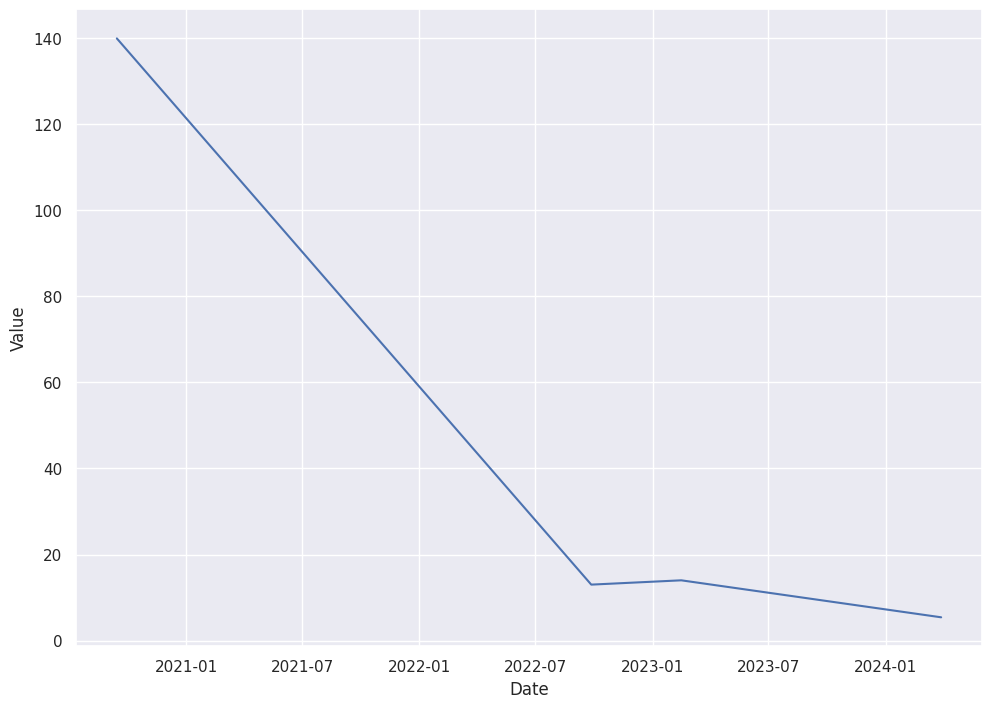

In [21]:
# Now looking at Tehama County with biggest outliers removed
## non-aggregated PFOA values
PFOA_tehama = PFOA[
    (PFOA["City"] == "RED BLUFF") & (PFOA["Value"] < 200)] #only one city (Red Bluff) in this county with any data
sns.lineplot(x = PFOA_tehama["Date"], y = PFOA_tehama["Value"])

<ipython-input-22-c1d5ecac6b50>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFOA_prophet_teh.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)
<ipython-input-22-c1d5ecac6b50>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFOA_prophet_teh['cap'] = 200
<ipython-input-22-c1d5ecac6b50>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

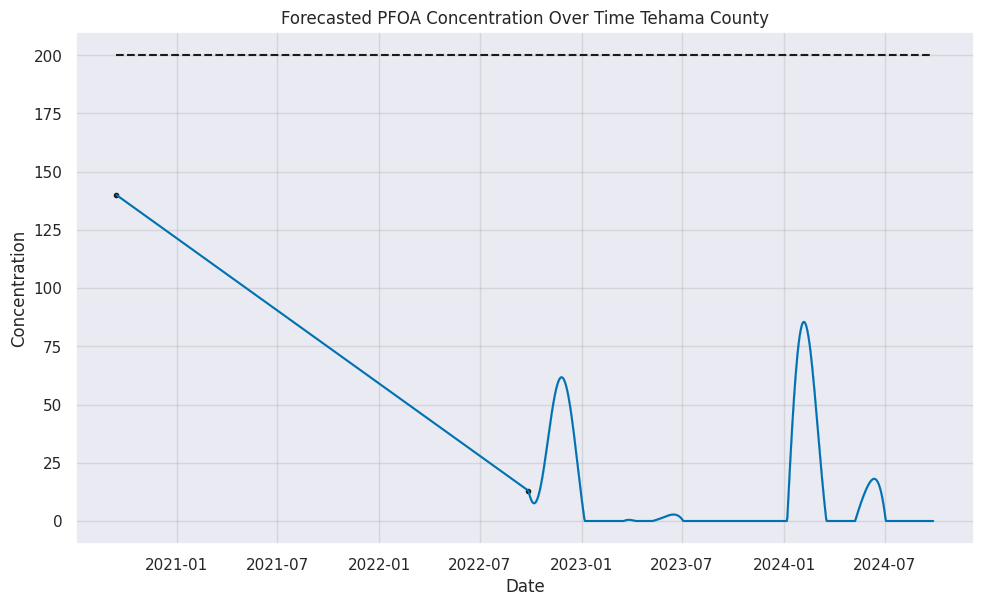

In [22]:
## TIME SERIES FOR PFOA IN TEHAMA COUNTY - specifically just city of Red Bluff

# Remove outliers from the dataset
from prophet import Prophet
import matplotlib.pyplot as plt


# Prepare the data
PFOA_prophet_teh = PFOA_tehama[["Date", "Value"]]
PFOA_prophet_teh.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)

# Add cap and floor BEFORE splitting the dataset
PFOA_prophet_teh['cap'] = 200
PFOA_prophet_teh['floor'] = 0

# Split into training and testing sets
trainPFOA_tehama = PFOA_prophet_teh.head(int(PFOA_prophet_teh.shape[0] * 0.70))
testPFOA_tehama = PFOA_prophet_teh.tail(int(PFOA_prophet_teh.shape[0] * 0.30))

# Initialize Prophet with logistic growth and parameter tuning
m = Prophet(
    daily_seasonality= False,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=15,  # Adjust seasonality flexibility
    changepoint_prior_scale=0.5,  # Adjust trend flexibility
    growth='linear' # for more flexibility
)

m.add_seasonality(name='yearly', period=365.25, fourier_order=4)

# Fit the model
m.fit(trainPFOA_tehama)

# Create future dataframe for forecasting
futurePFOA_tehama = m.make_future_dataframe(periods=730)
futurePFOA_tehama['cap'] = 200
futurePFOA_tehama['floor'] = 0

# Make predictions
forecastPFOA_tehama = m.predict(futurePFOA_tehama)


forecastPFOA_tehama['yhat'] = forecastPFOA_tehama['yhat'].clip(lower=0, upper = 200)
forecastPFOA_tehama['yhat_lower'] = forecastPFOA_tehama['yhat_lower'].clip(lower=0, upper=200)
forecastPFOA_tehama['yhat_upper'] = forecastPFOA_tehama['yhat_upper'].clip(lower=0, upper=200)

# Plot the adjusted forecast
fig1 = m.plot(forecastPFOA_tehama)
plt.title("Forecasted PFOA Concentration Over Time Tehama County")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.show()



In [23]:
from sklearn.metrics import mean_absolute_percentage_error

# Merge test and forecast data
merged_data = pd.merge(testPFOA_tehama, forecastPFOA_tehama[['ds', 'yhat']], on='ds', how='inner')

# Calculate MAPE
mape_PFOA = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])

print(f"MAPE: {mape_PFOA * 100:.2f}%")

MAPE: 100.00%


Best MAPE value yet, but still very poor. Only going off of data from one city.

<Axes: xlabel='Date', ylabel='Value'>

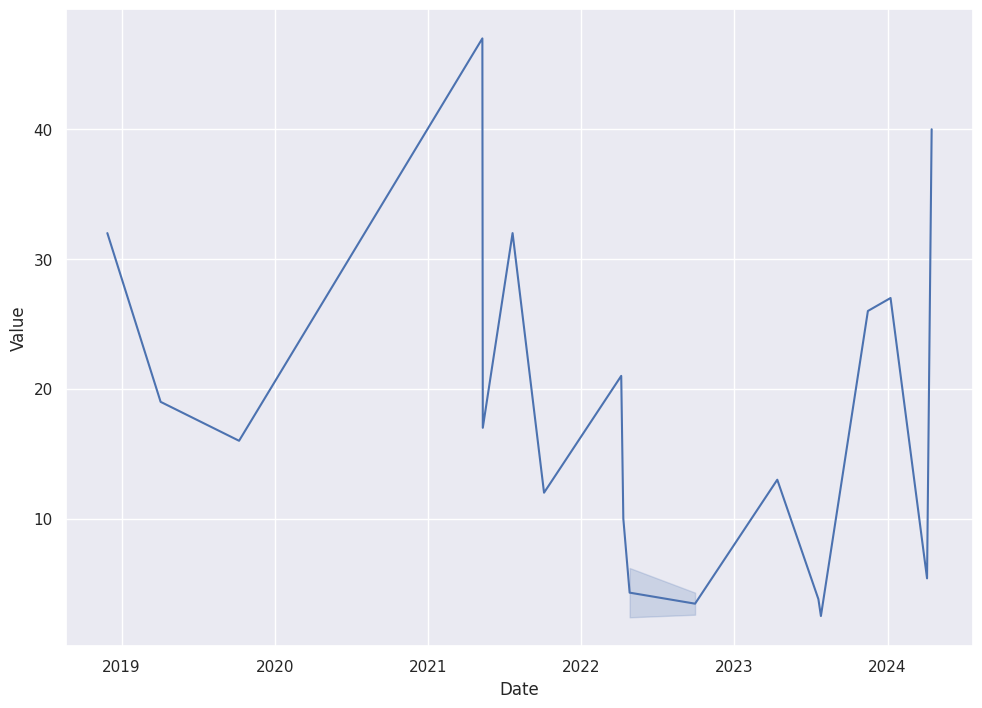

In [24]:
# PFOS in Livermore, Alameda County (High Income, High concentration)
## another location that was identified to be investigated
PFOS_liv = PFOS[
    (PFOS["City"] == "LIVERMORE") & (PFOS["Value"] < 100)]
sns.lineplot(x = PFOS_liv["Date"], y = PFOS_liv["Value"])

<ipython-input-25-705161e406b0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFOS_prophet_liv.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)
<ipython-input-25-705161e406b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFOS_prophet_liv['cap'] = 70
<ipython-input-25-705161e406b0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

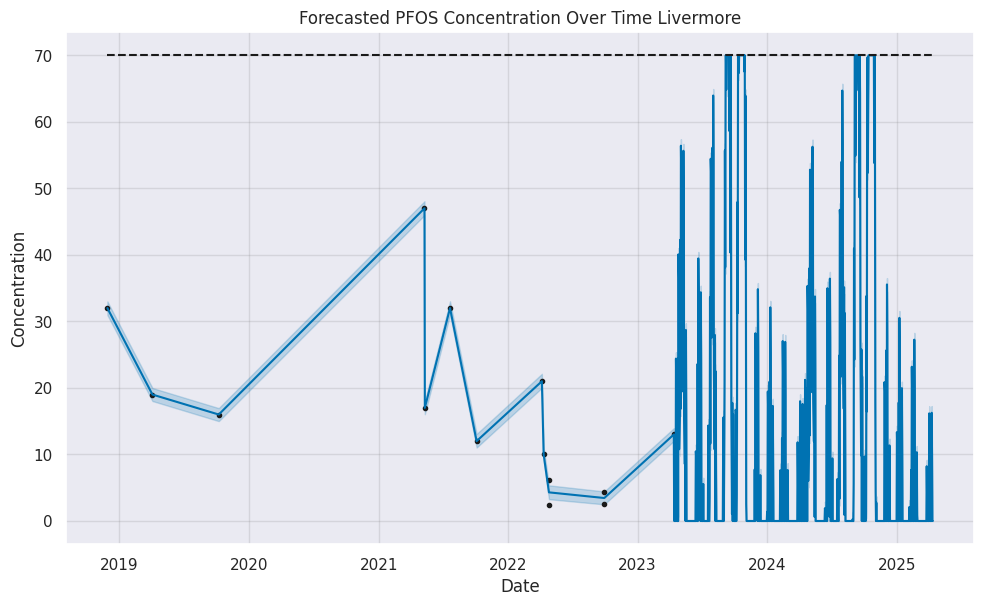

In [25]:
## TIME SERIES FOR PFOS IN livermore, alameda county

# Remove outliers from the dataset
from prophet import Prophet
import matplotlib.pyplot as plt


# Prepare the data
PFOS_prophet_liv = PFOS_liv[["Date", "Value"]]
PFOS_prophet_liv.rename(columns={"Date": "ds", "Value": "y"}, inplace=True)

# Add cap and floor BEFORE splitting the dataset
PFOS_prophet_liv['cap'] = 70
PFOS_prophet_liv['floor'] = 0

# Split into training and testing sets
trainPFOS_liv = PFOS_prophet_liv.head(int(PFOS_prophet_liv.shape[0] * 0.70))
testPFOS_liv = PFOS_prophet_liv.tail(int(PFOS_prophet_liv.shape[0] * 0.30))

# Initialize Prophet with logistic growth and parameter tuning
m = Prophet(
    daily_seasonality=False,
    changepoint_prior_scale=0.5,  # Adjust trend flexibility
    growth='linear' # for more flexibility
)



# Fit the model
m.fit(trainPFOS_liv)

# Create future dataframe for forecasting
futurePFOS_liv = m.make_future_dataframe(periods=730)
futurePFOS_liv['cap'] = 70
futurePFOS_liv['floor'] = 0

# Make predictions
forecastPFOS_liv = m.predict(futurePFOS_liv)


forecastPFOS_liv['yhat'] = forecastPFOS_liv['yhat'].clip(lower=0, upper=70)
forecastPFOS_liv['yhat_lower'] = forecastPFOS_liv['yhat_lower'].clip(lower=0, upper=70)
forecastPFOS_liv['yhat_upper'] = forecastPFOS_liv['yhat_upper'].clip(lower=0, upper=70)

# Plot the adjusted forecast
fig1 = m.plot(forecastPFOS_liv)
plt.title("Forecasted PFOS Concentration Over Time Livermore")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.show()



# continuous time factors - the data we have is not continuous sampling
# other random factors for spikes - covid, unpredictable events that could can skew anything
# talk abt thought process --> modeling etc
# talk about time series analysis and not forecasting, why forecasting doesn't work

In [26]:
# Time series for PFOS in Livermore, where values are high
from sklearn.metrics import mean_absolute_percentage_error

# Merge test and forecast data
merged_data = pd.merge(testPFOS_liv, forecastPFOS_liv[['ds', 'yhat']], on='ds', how='inner')

# Calculate MAPE
mape_liv = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])

print(f"MAPE: {mape_liv * 100:.2f}%")

MAPE: 443.98%


Very poor.